In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [2]:
data = pd.read_excel('../Data/Abusive_text_clean.xlsx')
data.head()

,Unnamed: 0,Comment,Label,Cleaned
0,0,হ্যাতেরা টিস্যু দিয়া মুখ মোছবে আর জনগনের পকেট ...,Neutral,হ্যাতেরা টিস্যু দিয়া মুখ মোছবে জনগনের পকেট কাটা
1,1,"হ্যা! দেওয়াল ধরে দাড়ায় থাকো,পিছন দিয়ে এসে মেরে...",Negative,হ্যা দেওয়াল দাড়ায় থাকো পিছন দিয়ে মেরে দিবে
2,2,হ্যাঁ এইটা সুন্দর,Positive,হ্যাঁ এইটা সুন্দর
3,3,হিজড়া হিরো,Negative,হিজড়া হিরো
4,4,হোগা মারা সারা,Negative,হোগা মারা সারা


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6848 entries, 0 to 6847
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6848 non-null   int64 
 1   Comment     6848 non-null   object
 2   Label       6848 non-null   object
 3   Cleaned     6834 non-null   object
dtypes: int64(1), object(3)
memory usage: 214.1+ KB


In [4]:
data.drop(columns={'Unnamed: 0'},axis=1,inplace=True)
data.dropna(inplace=True)

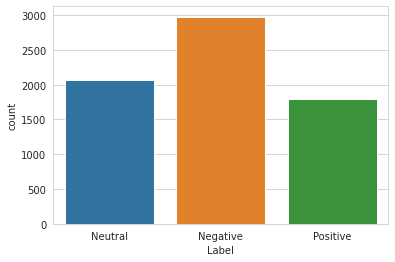

In [5]:
sns.set_style('whitegrid')
sns.countplot(x = 'Label', data = data)

In [6]:
# Length of each Text
data['length'] = data['Cleaned'].apply(lambda x:len(x.split()))
# Remove the Text with least words
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 6834


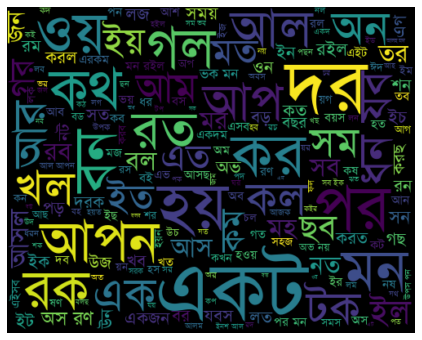

In [7]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['Cleaned']])
wordCloud = WordCloud(font_path='../SolaimanLipi/SolaimanLipi.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

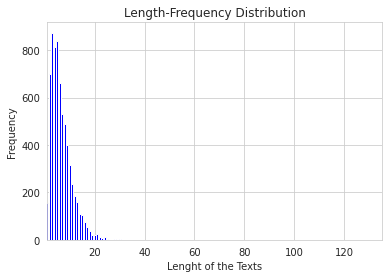

Maximum Length of a Text: 30
Minimum Length of a Text: 1
Average Length of a Text: 7.0


In [8]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.Cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [9]:
data.Cleaned

0        হ্যাতেরা টিস্যু দিয়া মুখ মোছবে জনগনের পকেট কাটা
1             হ্যা দেওয়াল দাড়ায় থাকো পিছন দিয়ে মেরে দিবে
2                                      হ্যাঁ এইটা সুন্দর
3                                             হিজড়া হিরো
4                                         হোগা মারা সারা
                              ...                       
6843                                    দোয়া রইল অফুরন্ত
6844                              মোটামুটি ভালোই ভিডিওটা
6845                              বাংলাদেশ দাদা ভালোবাসা
6846                         তোমার ভিডিও মন ভালো যথেষ্ট
6847    সময় চোখের পানি না শুভ কামনা রইলো তৌহিদ আফ্রিদির
Name: Cleaned, Length: 6834, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM

In [11]:
voc_size=10000
sent_length=30
num_of_epoch=15

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.Cleaned, data.Label, test_size=0.2, random_state=42)
print('Train data:', X_train.shape[0])
print('Test data:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

Train data: 5467
Test data: 1367


In [13]:
tokenizer = Tokenizer(num_words = voc_size, split = (' '))

tokenizer.fit_on_texts(X_train)

In [14]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [15]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    5467.000000
mean        6.522041
std         4.084501
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        30.000000
Name: Cleaned, dtype: float64

In [16]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=sent_length)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=sent_length)

In [17]:
# Example of padded sequence
X_train_seq_trunc[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    3,  408,  136, 2580], dtype=int32)

In [18]:
le = LabelEncoder()

y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [19]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=42)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)

Shape of validation set: (547, 30)


In [20]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(voc_size, 8, input_length=sent_length))
emb_model.add(layers.Conv1D(256,10,activation='relu'))
emb_model.add(layers.Bidirectional(LSTM(128,return_sequences=True)))
emb_model.add(layers.LSTM(64))
emb_model.add(layers.Dropout(0.4))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))
emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 8)             80000     
                                                                 
 conv1d (Conv1D)             (None, 21, 256)           20736     
                                                                 
 bidirectional (Bidirectiona  (None, 21, 256)          394240    
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                        

In [21]:
# emb_model = models.Sequential()
# emb_model.add(layers.Embedding(voc_size, 8, input_length=sent_length))
# emb_model.add(layers.Flatten())
# emb_model.add(layers.Dense(3, activation='softmax'))
# emb_model.summary()

In [22]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=num_of_epoch
                       , batch_size=64
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history

In [23]:
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)

Epoch 1/15
77/77 [==============================] - 33s 280ms/step - loss: 1.0356 - accuracy: 0.4722 - val_loss: 0.8121 - val_accuracy: 0.6124
Epoch 2/15
77/77 [==============================] - 14s 182ms/step - loss: 0.6593 - accuracy: 0.7228 - val_loss: 0.6931 - val_accuracy: 0.6947
Epoch 3/15
77/77 [==============================] - 14s 181ms/step - loss: 0.3677 - accuracy: 0.8624 - val_loss: 0.6445 - val_accuracy: 0.7495
Epoch 4/15
77/77 [==============================] - 14s 180ms/step - loss: 0.2182 - accuracy: 0.9268 - val_loss: 0.5233 - val_accuracy: 0.8282
Epoch 5/15
77/77 [==============================] - 14s 179ms/step - loss: 0.1395 - accuracy: 0.9551 - val_loss: 0.5539 - val_accuracy: 0.8318
Epoch 6/15
77/77 [==============================] - 14s 180ms/step - loss: 0.0972 - accuracy: 0.9683 - val_loss: 0.4984 - val_accuracy: 0.8647
Epoch 7/15
77/77 [==============================] - 14s 180ms/step - loss: 0.0652 - accuracy: 0.9811 - val_loss: 0.5359 - val_accuracy: 0.8684

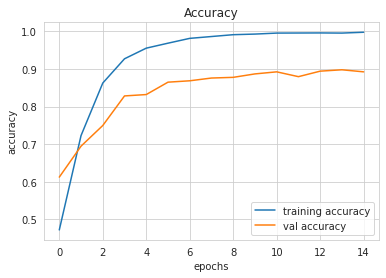

In [24]:
plt.figure(0)
plt.plot(emb_history.history['accuracy'], label='training accuracy')
plt.plot(emb_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

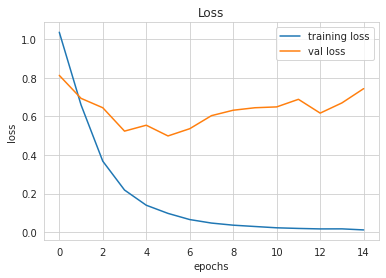

In [25]:
plt.figure(1)
plt.plot(emb_history.history['loss'], label='training loss')
plt.plot(emb_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
score = emb_model.evaluate(X_train_seq_trunc, y_train_oh, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9873788356781006


In [27]:
score = emb_model.evaluate(X_test_seq_trunc, y_test_oh, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.910021960735321
